In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-08-24,"48,846.3","49,532.5","49,847.4","48,812.4",59.89K,-1.40%
2021-08-23,"49,539.7","49,255.4","50,498.8","49,038.6",75.37K,0.58%
2021-08-22,"49,254.5","48,870.4","49,480.3","48,151.0",49.32K,0.77%
2021-08-21,"48,875.8","49,330.0","49,719.1","48,293.5",18.20K,-0.91%
2021-08-20,"49,324.0","46,756.7","49,343.3","46,646.8",83.19K,5.49%


In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from prophet import Prophet

In [84]:
# Load the dataset
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'], index_col='Date')


# Convert 'Price' column to float type
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Check for stationarity
result = adfuller(df['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Apply differencing
df['Price_diff'] = df['Price'] - df['Price'].shift(1)

ADF Statistic: -2.687474
p-value: 0.076231


In [21]:
# Apply ARIMA model
model = ARIMA(df['Price'], order=(5,1,0))
model_fit = model.fit()

# Apply SARIMA model
model = SARIMAX(df['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(df['Price'])
model_fit = model.fit()

# Apply Holt's Linear Trend Method
model = Holt(df['Price'])
model_fit = model.fit()

# Apply Holt-Winters Method
model = ExponentialSmoothing(df['Price'])
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
# Calculate error metrics
y_true = df['Price'].values
y_pred = model_fit.fittedvalues.values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

# Create a new dataframe for Prophet model
df_prophet = df[['Date', 'Price']].copy()
df_prophet.columns = ['ds', 'y']  # rename the columns for Prophet compatibility

# Use Prophet for forecasting
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

MAE: 166.976514
MSE: 273574.682871
RMSE: 523.043672


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzww6ii_p/39vccdt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzww6ii_p/l0647hwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46605', 'data', 'file=/tmp/tmpzww6ii_p/39vccdt8.json', 'init=/tmp/tmpzww6ii_p/l0647hwq.json', 'output', 'file=/tmp/tmpzww6ii_p/prophet_modelf9eb0thv/prophet_model-20231011043739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4056 entries, 2021-08-24 to 2010-07-18
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       4056 non-null   float64
 1   Open        4056 non-null   object 
 2   High        4056 non-null   object 
 3   Low         4056 non-null   object 
 4   Vol.        4056 non-null   object 
 5   Change %    4056 non-null   object 
 6   Price_diff  4055 non-null   float64
dtypes: float64(2), object(5)
memory usage: 253.5+ KB


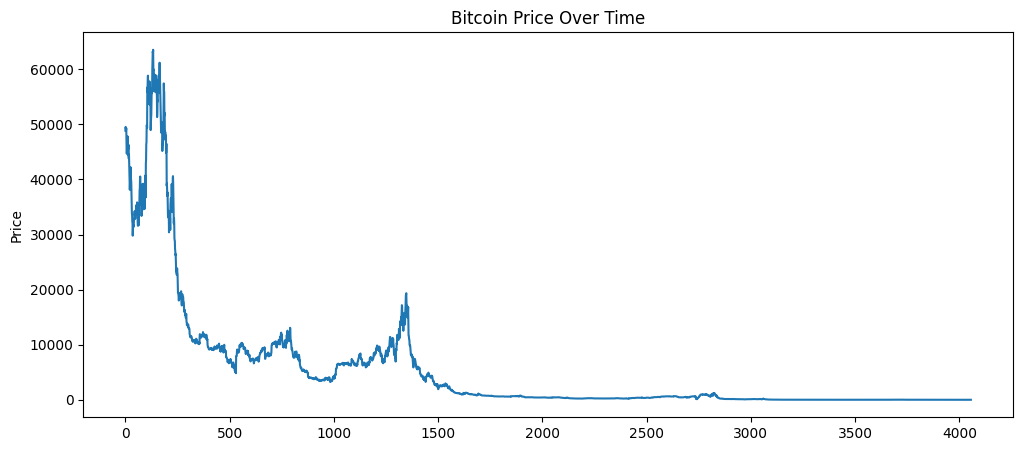

In [29]:
# Create a line plot of the time series data
df['Price'].plot(figsize=(12, 5))
df['Price']
plt.title('Bitcoin Price Over Time')
plt.ylabel('Price')
plt.show()

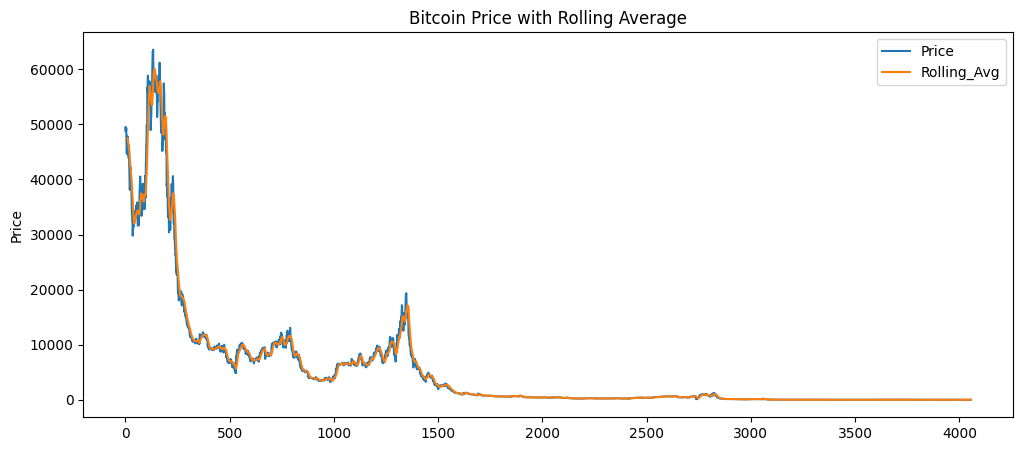

In [30]:
# Calculate and plot the rolling average
df['Rolling_Avg'] = df['Price'].rolling(window=12).mean()
df[['Price', 'Rolling_Avg']].plot(figsize=(12, 5))
plt.title('Bitcoin Price with Rolling Average')
plt.ylabel('Price')
plt.show()

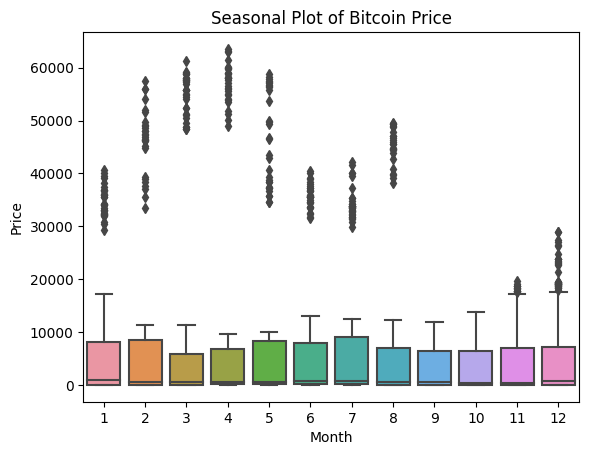

In [37]:
# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

# Create a new column 'Month' in your dataframe
df['Month'] = df.index.month

# Now you can create your boxplot
sns.boxplot(x='Month', y='Price', data=df)
plt.title('Seasonal Plot of Bitcoin Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

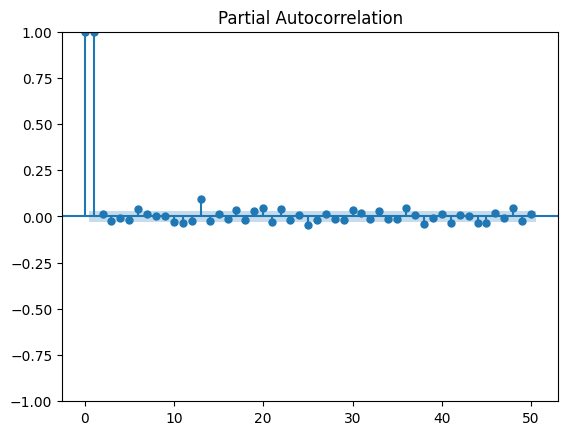

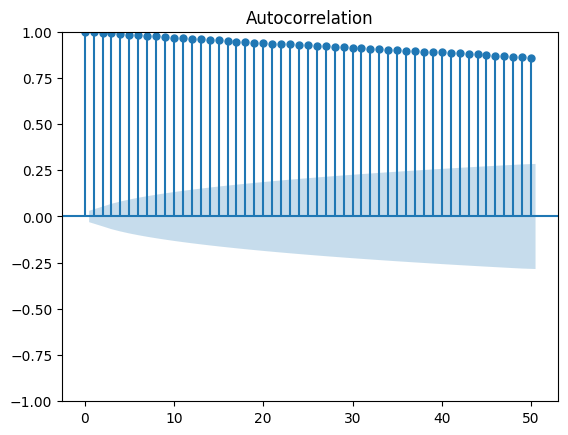

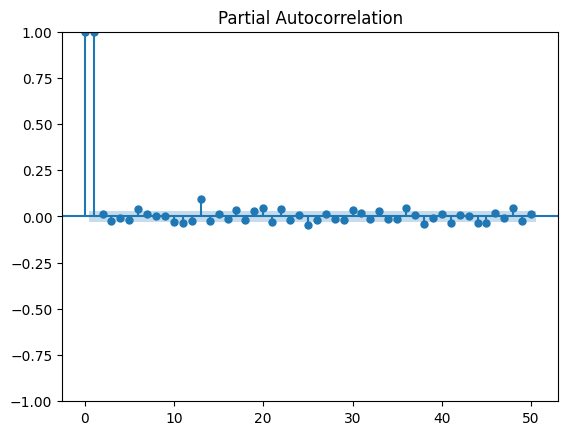

In [38]:
# Create autocorrelation and partial autocorrelation plots
plot_acf(df['Price'], lags=50)
plot_pacf(df['Price'], lags=50)

In [39]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Price'])

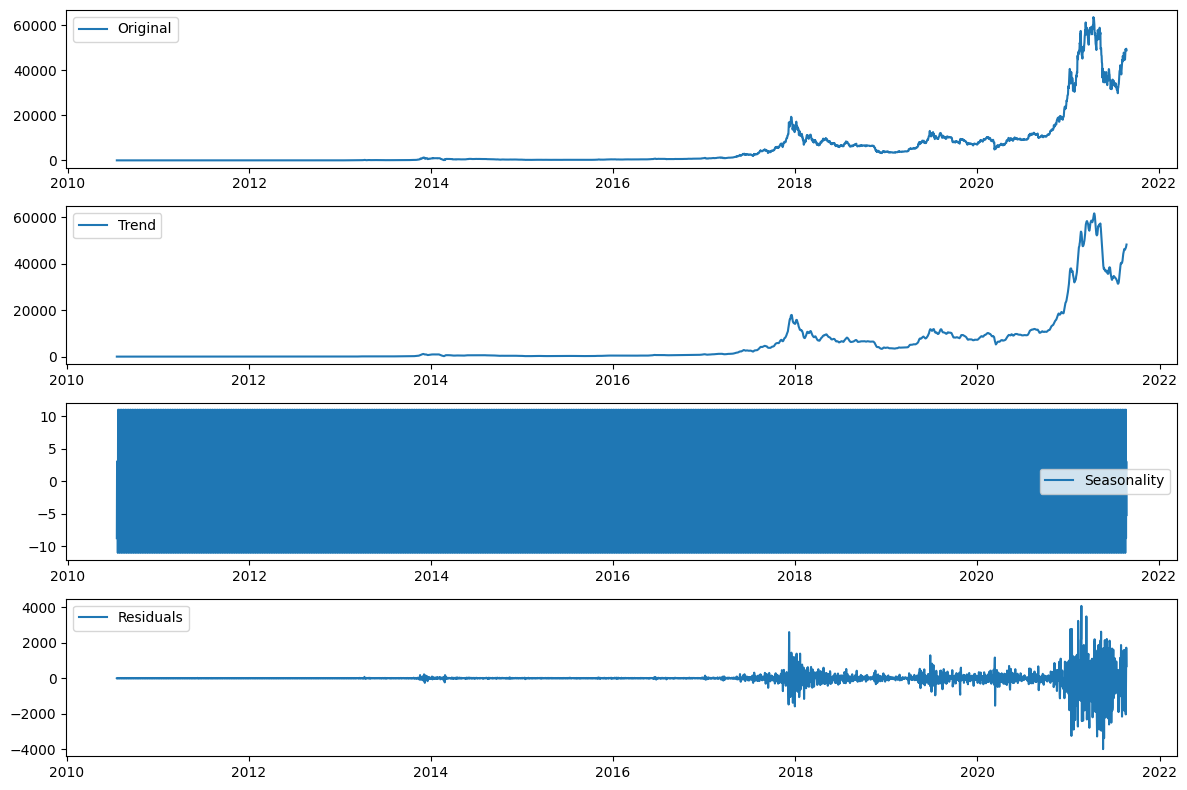

In [40]:
# Plot the original time series, trend, seasonality, and residuals
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


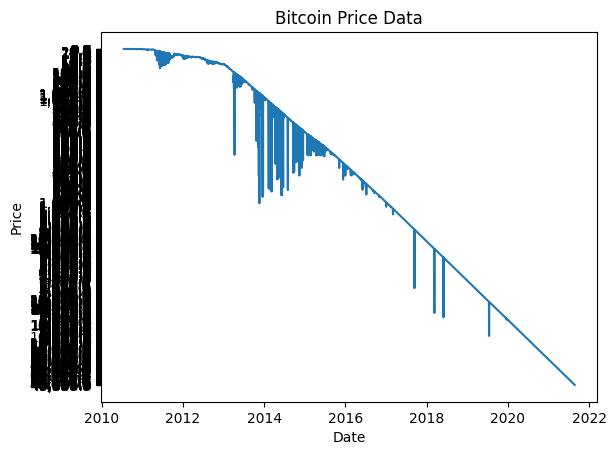

In [86]:
#1.ARIMA Modeling:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the Bitcoin prices
plt.plot(data['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Data')
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

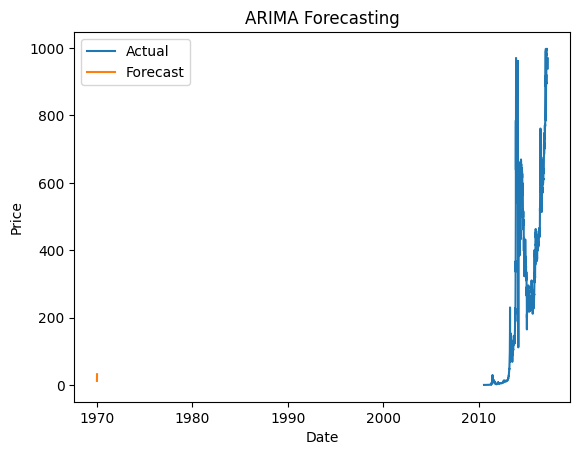

In [87]:
# Fit the ARIMA model
# Convert 'Price' column to numeric type
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

model = ARIMA(data['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Generate in-sample forecasts
forecast_arima = model_fit.predict(start=1, end=len(data), typ='levels')

# Plot the original data and the forecasts
plt.plot(data['Price'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction r

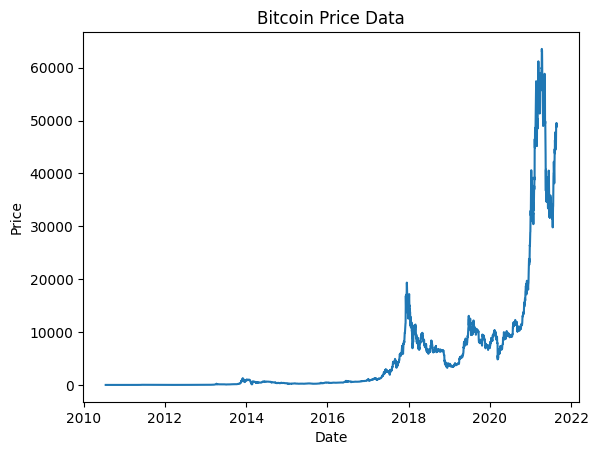

In [91]:
#2. SARIMA Modeling:


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Generate in-sample forecasts
# Fit the SARIMA model
model = SARIMAX(data['Price'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()

# Generate in-sample forecasts
forecast_sarima = model_fit.predict(start=1, end=len(data), typ='levels')


# Plot the Bitcoin prices
plt.plot(data['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Data')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzww6ii_p/i7cnrs05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzww6ii_p/7tgop5oa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44529', 'data', 'file=/tmp/tmpzww6ii_p/i7cnrs05.json', 'init=/tmp/tmpzww6ii_p/7tgop5oa.json', 'output', 'file=/tmp/tmpzww6ii_p/prophet_modelvcbrr62n/prophet_model-20231011060054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


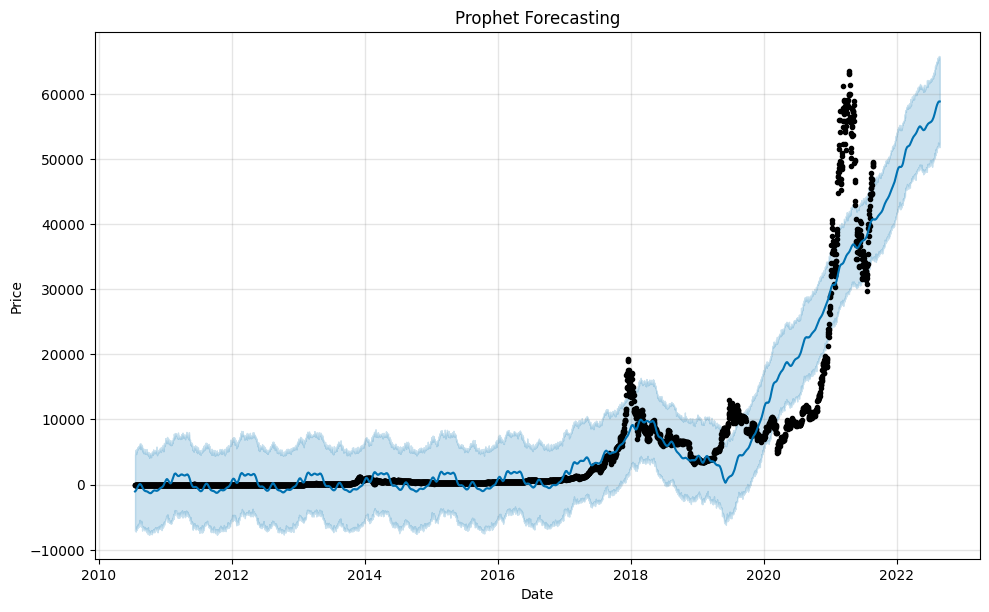

In [102]:
#3.Prophet Modeling:

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

data_prophet = data.copy()

# Rename the columns for Prophet
data_prophet = data_prophet.rename(columns={'Date': 'ds', 'Price': 'y'})

# Convert 'Price' column to float type
data_prophet['y'] = data_prophet['y'].str.replace(',', '').astype(float)

# Create a Prophet model
model = Prophet()

# Fit the model to the Bitcoin price data
model.fit(data_prophet)

# Generate in-sample forecasts
future = model.make_future_dataframe(periods=365)
forecast_prophet = model.predict(future)

# Plot the forecasted values
model.plot(forecast_prophet, xlabel='Date', ylabel='Price')
plt.title('Prophet Forecasting')
plt.show()

In [98]:
# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)
# Calculate MAE and RMSE for ARIMA model
mae_arima = mean_absolute_error(data['Price'], forecast_arima)
rmse_arima = sqrt(mean_squared_error(data['Price'], forecast_arima))
print("ARIMA Model - MAE: ", mae_arima)
print("ARIMA Model - RMSE: ", rmse_arima)


ARIMA Model - MAE:  5261.170695714744
ARIMA Model - RMSE:  12094.48665389218


SARIMA Model - MAE:  101.17460429055242
SARIMA Model - RMSE:  434.35374322802073


In [105]:
# Calculate MAE and RMSE for Prophet model
forecast_prophet_matched = forecast_prophet['yhat'][:len(data_prophet)]
mae_prophet = mean_absolute_error(data_prophet['y'], forecast_prophet_matched)
rmse_prophet = sqrt(mean_squared_error(data_prophet['y'], forecast_prophet_matched))
print("Prophet Model - MAE: ", mae_prophet)
print("Prophet Model - RMSE: ", rmse_prophet)


Prophet Model - MAE:  10587.878931955429
Prophet Model - RMSE:  16362.271970371748


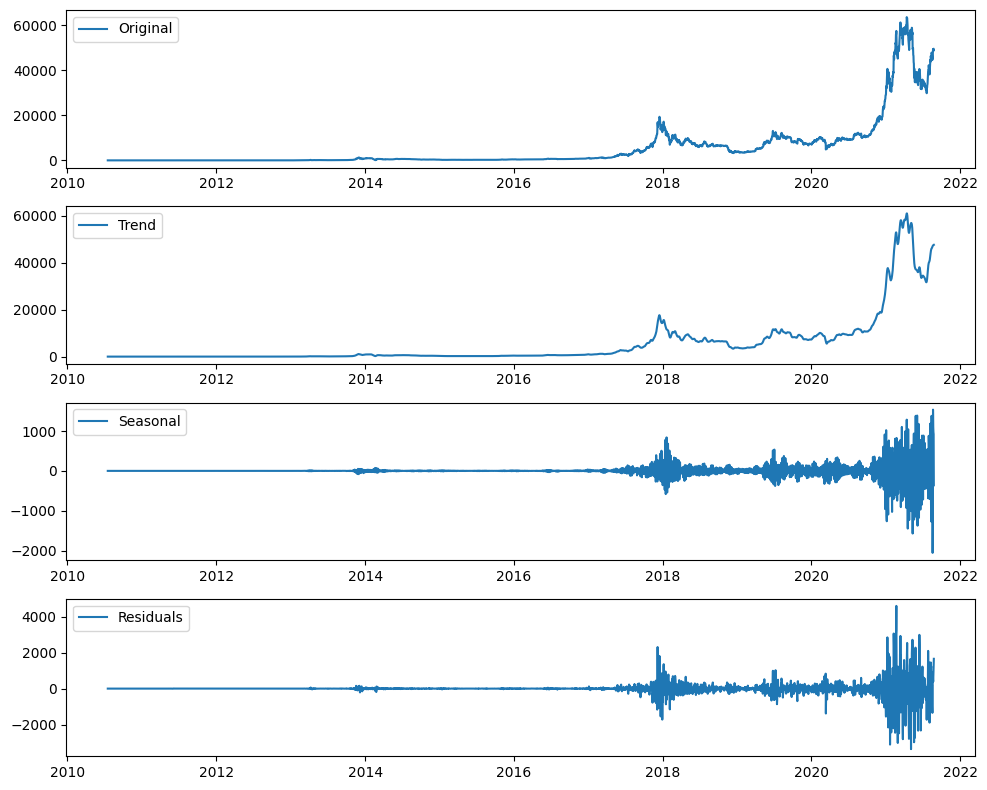

In [108]:
# Seasonality Decomposition (STL):
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Perform STL decomposition
decomposition = STL(data['Price'])
result = decomposition.fit()

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
ax1.plot(data['Price'], label='Original')
ax1.legend()
ax2.plot(result.trend, label='Trend')
ax2.legend()
ax3.plot(result.seasonal, label='Seasonal')
ax3.legend()
ax4.plot(result.resid, label='Residuals')
ax4.legend()
plt.tight_layout()
plt.show()

In [109]:
# Anomaly Detection (Z-Score)
import pandas as pd
import numpy as np

# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)


# Calculate z-score
z_scores = (data['Price'] - data['Price'].mean()) / data['Price'].std()

# Set the threshold for anomaly detection
threshold = 2.0

# Detect anomalies
anomalies = data[np.abs(z_scores) > threshold]

# Print the detected anomalies
print("Anomalies:")
print(anomalies)

Anomalies:
              Price      Open      High       Low     Vol. Change %
Date                                                               
2021-08-24  48846.3  49,532.5  49,847.4  48,812.4   59.89K   -1.40%
2021-08-23  49539.7  49,255.4  50,498.8  49,038.6   75.37K    0.58%
2021-08-22  49254.5  48,870.4  49,480.3  48,151.0   49.32K    0.77%
2021-08-21  48875.8  49,330.0  49,719.1  48,293.5   18.20K   -0.91%
2021-08-20  49324.0  46,756.7  49,343.3  46,646.8   83.19K    5.49%
...             ...       ...       ...       ...      ...      ...
2021-01-01  29359.9  28,951.7  29,627.1  28,712.4  100.90K    1.42%
2020-12-31  28949.4  28,866.8  29,298.8  28,025.0  136.69K    0.28%
2020-12-30  28868.7  27,374.5  28,979.3  27,374.5  159.82K    5.45%
2020-12-29  27376.0  27,065.3  27,390.7  25,902.8  119.57K    1.18%
2020-12-28  27057.8  26,259.2  27,444.9  26,144.3  126.98K    3.03%

[240 rows x 6 columns]


In [4]:
# LSTM Model for Time Series Forecasting:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Load the Bitcoin price data
data = pd.read_csv('bitcoin_price.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Prepare the data for LSTM
sequence_length = 10
X = []
y = []
# Assume 'Price' is the column in your dataframe
for i in range(len(data) - sequence_length):
    X.append(data['Price'].values[i:i+sequence_length])
    y.append(data['Price'].values[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=32)

# Generate forecasts
forecast = model.predict(X)

# Print the forecasts
print("Forecasts:")
print(forecast)

Epoch 1/100
127/127 [==============================] - 4s 7ms/step - loss: 141118048.0000
Epoch 2/100
127/127 [==============================] - 1s 7ms/step - loss: 140998336.0000
Epoch 3/100
127/127 [==============================] - 1s 7ms/step - loss: 140901456.0000
Epoch 4/100
127/127 [==============================] - 1s 7ms/step - loss: 140826160.0000
Epoch 5/100
127/127 [==============================] - 1s 7ms/step - loss: 140759632.0000
Epoch 6/100
127/127 [==============================] - 1s 7ms/step - loss: 140695680.0000
Epoch 7/100
127/127 [==============================] - 1s 8ms/step - loss: 140630240.0000
Epoch 8/100
127/127 [==============================] - 1s 8ms/step - loss: 140565984.0000
Epoch 9/100
127/127 [==============================] - 1s 7ms/step - loss: 140502592.0000
Epoch 10/100
127/127 [==============================] - 1s 7ms/step - loss: 140440256.0000
Epoch 11/100
127/127 [==============================] - 1s 7ms/step - loss: 140378288.0000
Epoch 12